# The Iris Classification Problem

## Feature Variables

- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

## Target Class: Species

- Setosa
- Versicolor
- Virginica

## Goal

- Build an ANN model to predict spiecies.

In [1]:
!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 MB 3.4 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 8.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.6 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 6.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 6.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.6 MB/s eta

# Perpare Input Data for Deep Learning

In [1]:
import os

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data
iris_data = pd.read_csv("iris.csv")
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Label encoder to convert String to numeric values for the target variable
label_encoder = preprocessing.LabelEncoder()
iris_data["Spiecies"] = label_encoder.fit_transform(iris_data["Species"])

In [4]:
# Convert input to np array
np_iris = iris_data.to_numpy()

In [5]:
# Separate features and target variables
X_data = np_iris[:,0:4]
Y_data = np_iris[:,4]

print(f"\nFeatures before scaling:\n{X_data[:5,:]}")
print(f"\nTarget before scaling:\n{Y_data[:5]}")


Features before scaling:
[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]]

Target before scaling:
['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


In [6]:
# The Feature Variables are numeric, so create a scaler model that fits on the input data
scaler = StandardScaler().fit(X_data)

# Scale the numeric feature varibales
X_data = scaler.transform(X_data)

# Convert target variables as one-hot-encoding array
le = preprocessing.LabelEncoder()
Y_data = le.fit_transform(Y_data)
Y_data = tf.keras.utils.to_categorical(Y_data, 3)

print(f"\nFeatures after scaling:\n{X_data[:5,:]}")
print(f"\nTarget after scaling:\n{Y_data[:5,:]}")


Features after scaling:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Target after scaling:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [7]:
# Split Training And Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.10)

print(f"Split data shapes:\n{X_train.shape, X_test.shape, Y_train.shape, Y_test.shape}")

Split data shapes:
((135, 4), (15, 4), (135, 3), (15, 3))


# Create a Model

In [8]:
# Number of classes in the target variable
NB_CLASSES = 3

In [9]:
# Create a Keras sequential model
model = tf.keras.models.Sequential()

In [10]:
# Define the input layer
model.add(tf.keras.Input(shape=(4,))) # Because we know we have 4 input variables

# Add the first hidden layer
model.add(
    tf.keras.layers.Dense(
        128,                   # Number of nodes
        name="Hidden-Layer-1", # Logical name
        activation="relu"      # Activation Function
    )
)

In [11]:
# Add second hidden layer
model.add(
    tf.keras.layers.Dense(
        128,                   # Number of nodes
        name="Hidden-Layer-2", # Logical name
        activation="relu"      # Activation Function
    )
)

In [12]:
# Add output layer with softmax activation
model.add(
    tf.keras.layers.Dense(
        NB_CLASSES,            # Number of nodes
        name="Output-Layer",   # Logical name
        activation="softmax"   # Activation Function
    )
)

In [13]:
# Compile the model with loss & metrics
model.compile(
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [14]:
# Show model metadata
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,539 (68.51 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

# Training & Evaluation

In [15]:
VERBOSE = 1

# Model hyperparameters
BATCH_SIZE = 16
EPOCHS = 10
VALIDATION_SPLIT = 0.2

In [16]:
# Train the model using Keras, using forward & back propagation, loss computation and gradient descent
history = model.fit(
    X_train,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=VERBOSE,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6457 - loss: 0.8888 - val_accuracy: 0.7407 - val_loss: 0.6209
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8318 - loss: 0.5481 - val_accuracy: 0.7407 - val_loss: 0.5288
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7836 - loss: 0.4605 - val_accuracy: 0.7407 - val_loss: 0.4847
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8436 - loss: 0.3351 - val_accuracy: 0.7407 - val_loss: 0.4481
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8740 - loss: 0.3211 - val_accuracy: 0.7407 - val_loss: 0.4213
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8545 - loss: 0.3162 - val_accuracy: 0.7407 - val_loss: 0.4010
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8862 - loss: 0.2507 - val_accuracy: 0.7407 - val_loss: 0.3760
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9002 - loss: 0.2581 - val_accuracy: 0.8148 - val_loss: 0.3551
Epoch 9

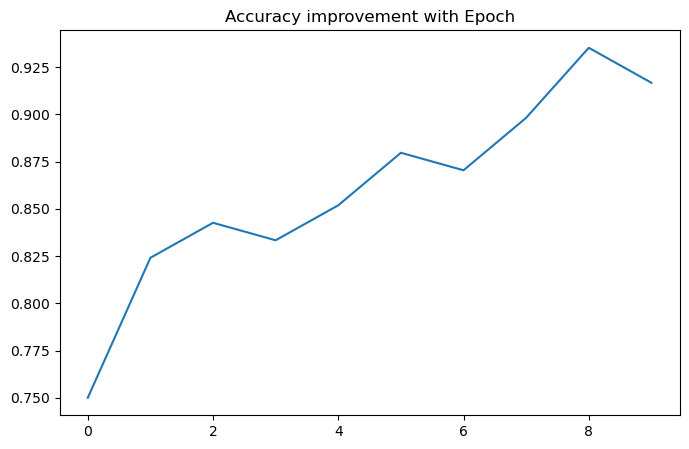

In [17]:
# Show accuracy during training
pd.DataFrame(
    history.history
)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvement with Epoch")
plt.show()

# Saving & Loading Models

In [19]:
# Save the model
model.save("iris_save.keras")

In [20]:
# Load model
loaded_model = tf.keras.models.load_model("iris_save.keras")

In [21]:
# Print Model Summary
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,080 (137.04 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,541 (68.52 KB)

# Predictions with DL Models

In [28]:
# Adding raw prediction data
prediction_input = [[6.6, 3., 4.4, 1.4]] # Sepal Length, Sepal Width, Petal Length, Petal Width

In [29]:
# Similar to training preprocessing,  scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)
scaled_input

array([[ 0.91683689, -0.13197948,  0.36489628,  0.26414192]])

In [25]:
# Get raw prediction probabilities
model = tf.keras.models.load_model("iris_save.keras")
raw_predicition = model.predict(scaled_input)

print(f"Raw prediction output: {raw_predicition}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Raw prediction output: [[0.02290688 0.6276837  0.34940943]]


In [27]:
# Find prediction
prediction = np.argmax(raw_predicition) # get index of highest probability

print(f"Predicition is: {label_encoder.inverse_transform([prediction])}")

Predicition is: ['versicolor']
